<a href="https://colab.research.google.com/github/abhimithra02/USA-householding/blob/main/USA_houing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML,display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression

In [ ]:
os.chdir("D:/DATA/Imartics/Python")

In [ ]:
us_hosing = pd.read_csv("USA_Housing.csv")

In [ ]:
us_hosing

,Avg_Income,Avg_House_Age,Avg_Number_Rooms,Avg_Number_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.24005,7.188236,5.586729,3.26,NaN,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\r\nFPO AE 73316


In [ ]:
us_hosing.shape

(5000, 7)

In [ ]:
us_hosing.head()

,Avg_Income,Avg_House_Age,Avg_Number_Rooms,Avg_Number_Bedrooms,Area_Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.24005,7.188236,5.586729,3.26,NaN,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [ ]:
us_hosing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg_Income             5000 non-null float64
Avg_House_Age          5000 non-null float64
Avg_Number_Rooms       4998 non-null float64
Avg_Number_Bedrooms    5000 non-null float64
Area_Population        4997 non-null float64
Price                  5000 non-null float64
Address                5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
us_hosing.describe()

,Avg_Income,Avg_House_Age,Avg_Number_Rooms,Avg_Number_Bedrooms,Area_Population,Price
count,5000.000000,5000.000000,4998.000000,5000.000000,4997.000000,5.000000e+03
mean,68583.108984,5.977222,6.987945,3.981330,36163.204569,1.232073e+06
std,10657.991214,0.991456,1.005520,1.234137,9928.499674,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299460,3.140000,29403.512060,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36198.440990,1.232669e+06
75%,75783.338665,6.650808,7.665633,4.490000,42873.050200,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
us_hosing.columns.to_list()

['Avg_Income',
 'Avg_House_Age',
 'Avg_Number_Rooms',
 'Avg_Number_Bedrooms',
 'Area_Population',
 'Price',
 'Address']

In [ ]:
(us_hosing.isnull().sum()/us_hosing.shape[0])*100

Avg_Income             0.00
Avg_House_Age          0.00
Avg_Number_Rooms       0.04
Avg_Number_Bedrooms    0.00
Area_Population        0.06
Price                  0.00
Address                0.00
dtype: float64

In [ ]:
us_hosing.loc[0:4,["Avg_Number_Rooms","Price"]]

,Avg_Number_Rooms,Price
0,7.009188,1.059034e+06
1,6.730821,1.505891e+06
2,8.512727,1.058988e+06
3,5.586729,1.260617e+06
4,7.839388,6.309435e+05


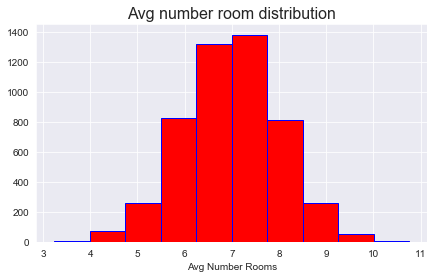

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(us_hosing["Avg_Number_Rooms"].dropna(),color='Red',
         edgecolor='b')
plt.title("Avg number room distribution",fontsize=16)
plt.xlabel("Avg Number Rooms")
plt.grid(True)
plt.show();


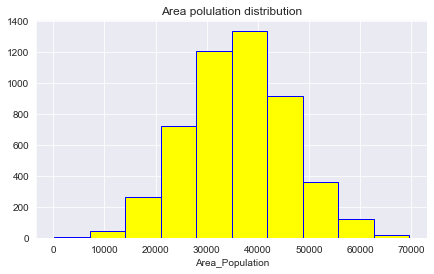

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(us_hosing["Area_Population"].dropna(),color='yellow',
         edgecolor='b')
plt.title("Area polulation distribution",fontsize=12)
plt.xlabel("Area_Population")
plt.grid(True)
plt.show();


In [ ]:
us_hosing.skew()

Avg_Income            -0.033720
Avg_House_Age         -0.007214
Avg_Number_Rooms      -0.040382
Avg_Number_Bedrooms    0.376240
Area_Population        0.050726
Price                 -0.002718
dtype: float64

In [ ]:
us_hosing.kurt()

Avg_Income             0.045574
Avg_House_Age         -0.083437
Avg_Number_Rooms      -0.072986
Avg_Number_Bedrooms   -0.701566
Area_Population       -0.008368
Price                 -0.054918
dtype: float64

In [ ]:
us_hosing.loc[us_hosing["Avg_Number_Rooms"].isnull(),"Avg_Number_Rooms"] = us_hosing["Avg_Number_Rooms"].median()

In [ ]:
us_hosing.isnull().sum()

Avg_Income             0
Avg_House_Age          0
Avg_Number_Rooms       0
Avg_Number_Bedrooms    0
Area_Population        3
Price                  0
Address                0
dtype: int64

In [ ]:
us_hosing.loc[us_hosing["Area_Population"].isnull(),"Area_Population"] = us_hosing["Area_Population"].median()

In [ ]:
us_hosing.isnull().sum()

Avg_Income             0
Avg_House_Age          0
Avg_Number_Rooms       0
Avg_Number_Bedrooms    0
Area_Population        0
Price                  0
Address                0
dtype: int64

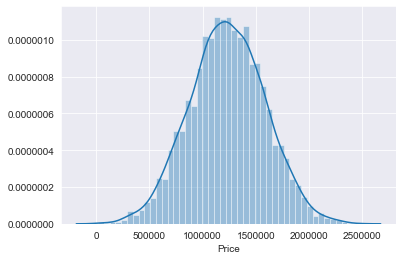

In [ ]:
sns.distplot(us_hosing['Price'])
plt.show();

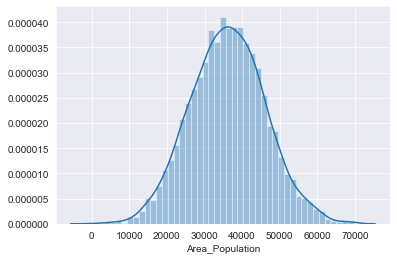

In [ ]:
sns.distplot(us_hosing['Area_Population'])
plt.show();

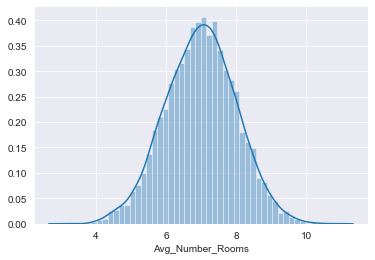

In [ ]:
sns.distplot(us_hosing['Avg_Number_Rooms'])
plt.show();

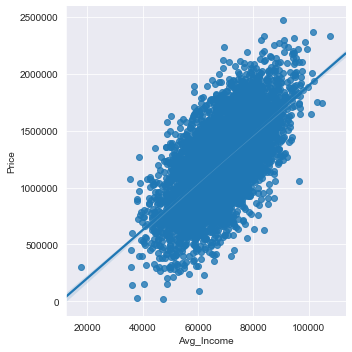

In [ ]:
sns.lmplot(x='Avg_Income',y='Price',data=us_hosing)

In [ ]:
us_hosing.corr()

,Avg_Income,Avg_House_Age,Avg_Number_Rooms,Avg_Number_Bedrooms,Area_Population,Price
Avg_Income,1.000000,-0.002007,-0.010889,0.019788,-0.016090,0.639734
Avg_House_Age,-0.002007,1.000000,-0.008237,0.006149,-0.018807,0.452543
Avg_Number_Rooms,-0.010889,-0.008237,1.000000,0.462571,0.002316,0.336155
Avg_Number_Bedrooms,0.019788,0.006149,0.462571,1.000000,-0.022139,0.171071
Area_Population,-0.016090,-0.018807,0.002316,-0.022139,1.000000,0.408591
Price,0.639734,0.452543,0.336155,0.171071,0.408591,1.000000


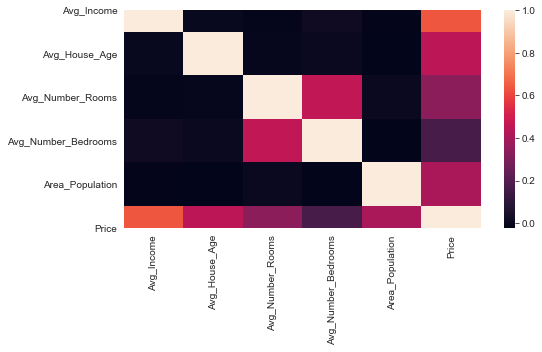

In [ ]:
cm = us_hosing.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cm)
plt.show();

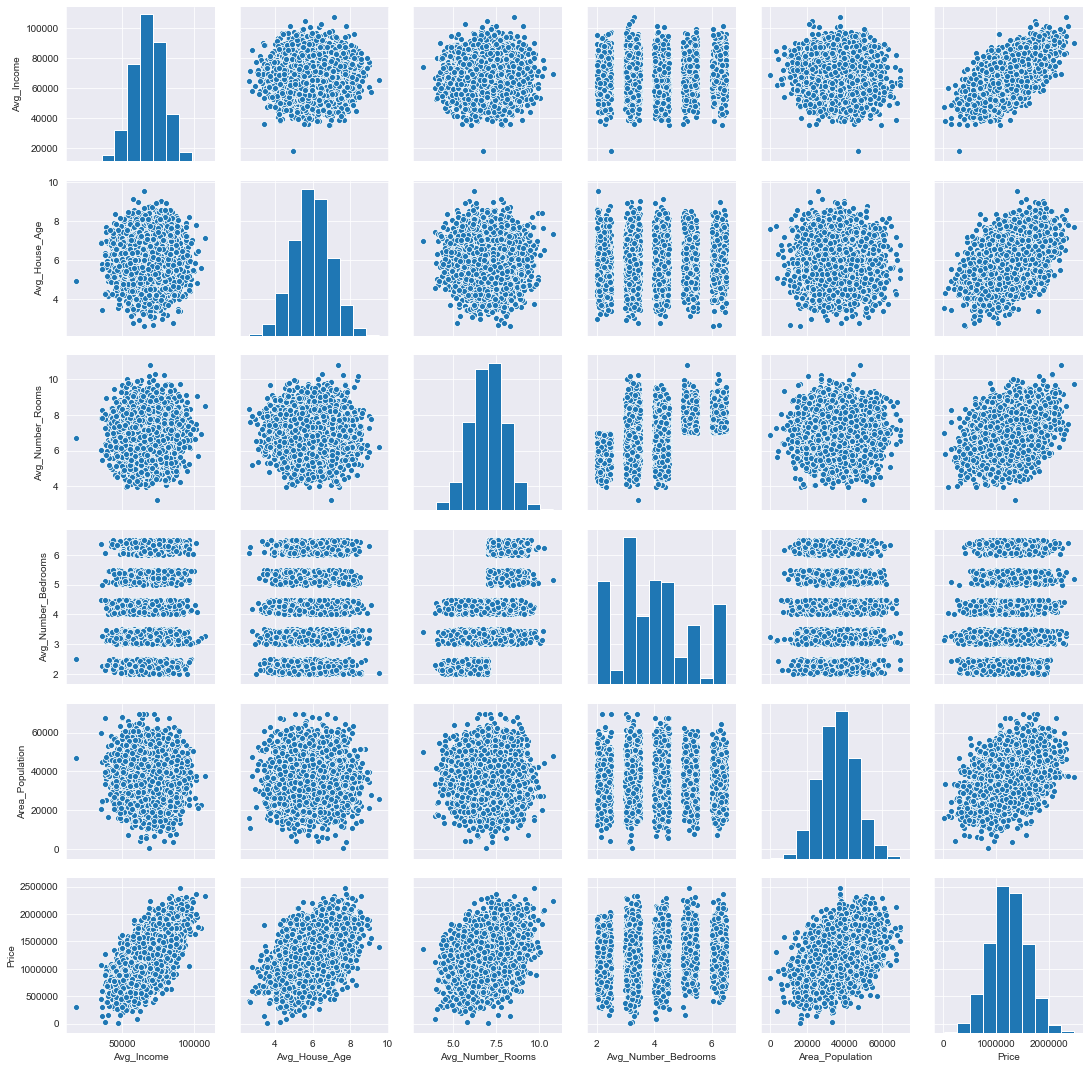

In [ ]:
sns.pairplot(us_hosing)

In [ ]:
## Feature Selection

X = us_hosing.drop(["Price","Address"],axis  = 1)
y = us_hosing["Price"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 101)

In [ ]:
df_train = X_train.copy()

In [ ]:
df_train["Price"] = y_train
df_train.head()

,Avg_Income,Avg_House_Age,Avg_Number_Rooms,Avg_Number_Bedrooms,Area_Population,Price
2654,86690.87330,6.259901,6.676265,3.23,42589.62439,1.723730e+06
2468,59866.94770,5.870330,5.899076,4.16,32064.59716,1.039381e+06
290,74372.13845,6.562380,8.184511,6.35,34321.96015,1.648247e+06
1463,61370.32349,6.529605,6.606744,4.30,20600.51100,8.245409e+05
4508,52652.65234,5.688943,7.217268,4.06,34776.58591,9.282108e+05


In [ ]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
housing_model = ols("Price ~ Avg_Income",data =  df_train).fit()

# summarize our model
housing_model_summary = housing_model.summary()
housing_model_summary

# convert our table to HTML and add colors to headers for explanatory purposes

HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

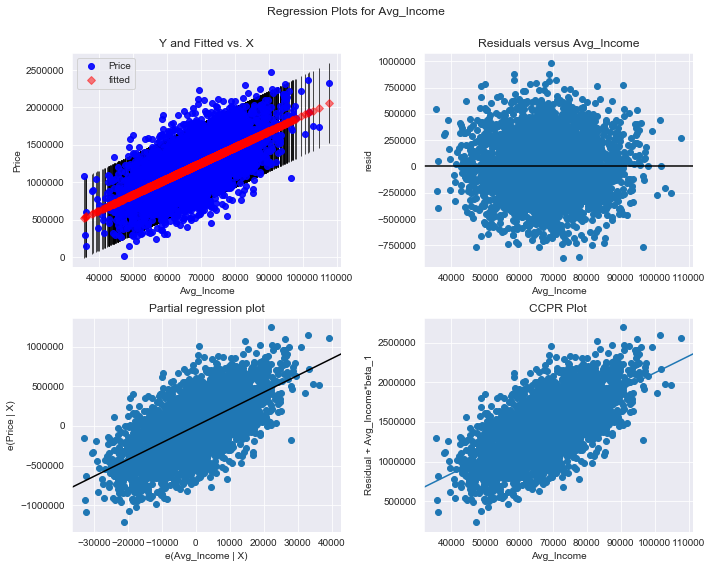

In [ ]:
# This produces our four regression plots for total_unemployed

fig = plt.figure(figsize=(10,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "Avg_Income", fig=fig)

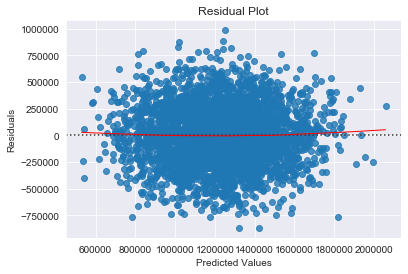

In [ ]:
sns.residplot(housing_model.fittedvalues,df_train['Price'],lowess=True,line_kws = {'color':'r','lw':1})
#plt.figure(figsize=(10,8))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show();

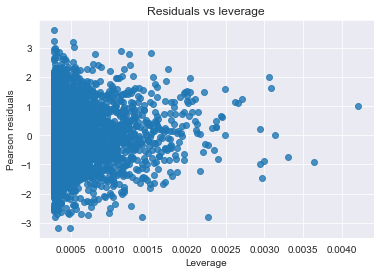

In [ ]:
#get data relating to high leverage points using statsmodels

# leverage, from statsmodels
model_leverage = housing_model.get_influence().hat_matrix_diag

# plot residuals vs high leverage points
sns.regplot(model_leverage, housing_model.resid_pearson, fit_reg=False)
#plt.xlim(xmin=0, xmax=0.037)
plt.xlabel('Leverage')
plt.ylabel("Pearson residuals")
plt.title("Residuals vs leverage")
plt.show();

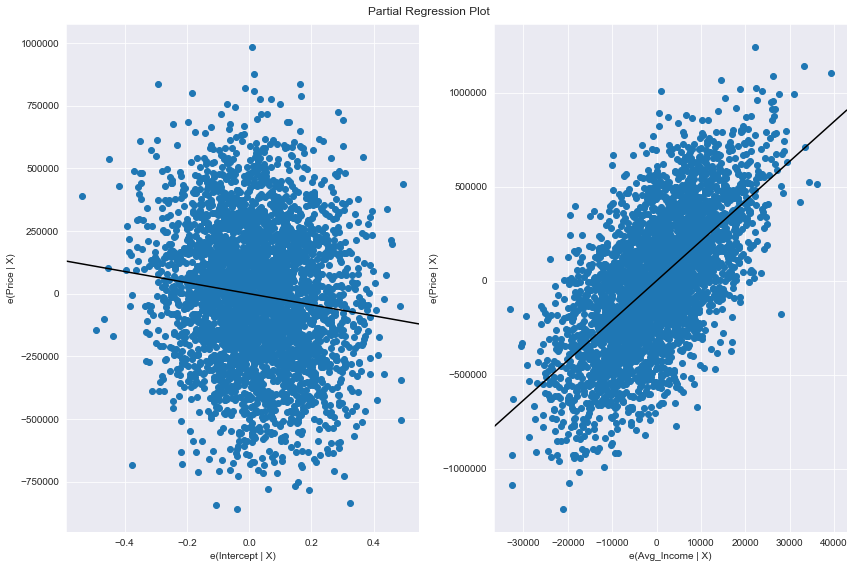

In [ ]:
# added-variable plots for our model
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

In [ ]:
# Lets build the First Machine Learning Model
housing_model_v2 = ols("""Price ~ Avg_Income + Avg_House_Age + Avg_Number_Rooms+ Avg_Number_Bedrooms + Area_Population""",
                       data=df_train).fit()

In [ ]:
# Summarize the Model
housing_model_v2_summary = housing_model_v2.summary()
HTML(housing_model_v2_summary.as_html())

In [ ]:
# Lets build the second Machine Learning Model
housing_model_v3 = ols("""Price ~ Avg_Income + Avg_House_Age + Avg_Number_Rooms+ Area_Population""",
                       data=df_train).fit()

# Summarize the Model
housing_model_v3_summary = housing_model_v3.summary()
HTML(housing_model_v3_summary.as_html())

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values,size=10)
plt.ylabel("Longitude",fontsize=12)
plt.xlabel("Latitube",fontsize=12)
plt.show()
sns.despine

NameError: name 'data' is not defined

<Figure size 720x720 with 0 Axes>

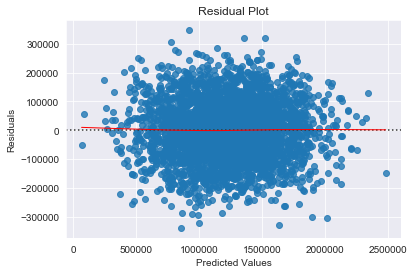

In [ ]:
sns.residplot(housing_model_v3.fittedvalues,df_train['Price'],lowess=True,line_kws = {'color':'r','lw':1})
#plt.figure(figsize=(15,8))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show();

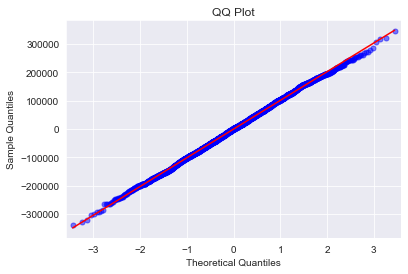

In [ ]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(housing_model_v3.resid)
fig = QQ.qqplot(alpha = 0.5,markersize = 5,line = 's')
plt.title('QQ Plot')
plt.show();

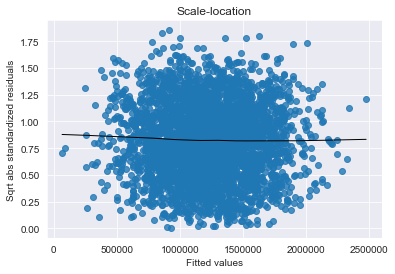

In [ ]:
# normalised residuals
model_norm_resid = housing_model_v3.get_influence().resid_studentized_internal

# absolute squared normalised residuals
model_norm_resid_abs_sqrt = np.sqrt(np.abs(model_norm_resid))

# plot scale-location
sns.regplot(housing_model_v3.fittedvalues, model_norm_resid_abs_sqrt, lowess=True, line_kws={'color':'k', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location')
plt.show();

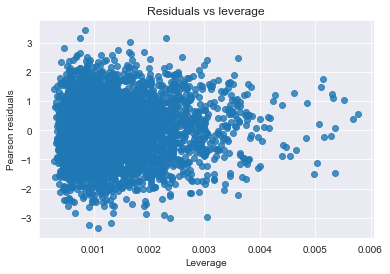

In [ ]:
#get data relating to high leverage points using statsmodels

# leverage, from statsmodels
model_leverage = housing_model_v3.get_influence().hat_matrix_diag

# plot residuals vs high leverage points
sns.regplot(model_leverage, housing_model_v3.resid_pearson, fit_reg=False)
#plt.xlim(xmin=0, xmax=0.037)
plt.xlabel('Leverage')
plt.ylabel("Pearson residuals")
plt.title("Residuals vs leverage")
plt.show();

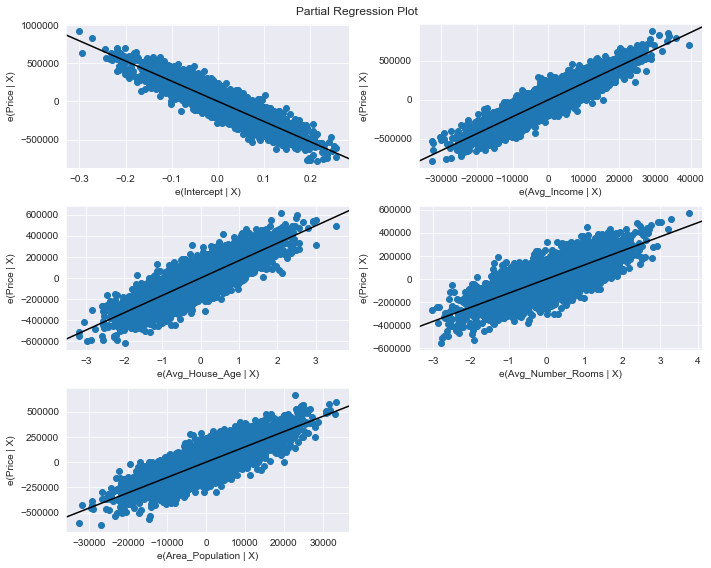

In [ ]:
# added-variable plots for our model
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_partregress_grid(housing_model_v3,fig=fig)

In [ ]:
y_pred = housing_model_v3.predict(X_test)
y_pred

1718    1.259024e+06
2511    8.202638e+05
345     1.743748e+06
2521    9.722930e+05
54      9.917175e+05
            ...     
3412    7.561743e+05
4020    1.167172e+06
4635    1.454253e+06
1700    6.470039e+05
790     1.362449e+06
Length: 1500, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("R2 score : %.2f" % r2_score(y_test,y_pred))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score : 0.92
Root Mean squared error: 101004.82
